# [Feature engineering for data preprocessing][1]

Using machine learning techniques requires to pre-process the data. In this step, we need to:
1. Clean the data from missing, noise, oultier data points.
2. Handle the existing fearures properly and/or add new features, when needed.

__Not all data preprocessing steps work well in all ML algorithms__


## [Categorical features][2]

### get_dummies:

The idea is to encode each categorical feature with numbers (one-to-one correspondence) with its categories.




[1]:https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
[2]:https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

np.random.seed(0)  # For reproducibility

In [2]:
## get_dummies:

X=['x1','x2','x3', np.nan]
pd.get_dummies(X)


,x1,x2,x3
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,0


In [3]:
pd.get_dummies(X,dummy_na=True)

,x1,x2,x3,nan
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [4]:
s = pd.Series(list('abca'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [5]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
pd.get_dummies(df, columns=['A','B'],prefix=['col1', 'col2'])


,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [6]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [7]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [8]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
pd.get_dummies(df, columns=['A','B'],prefix=['col1', 'col2'], dtype=float)

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1.0,0.0,0.0,1.0,0.0
1,2,0.0,1.0,1.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,1.0


In [9]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [10]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
pd.get_dummies(df, columns=['A','B'],prefix=['col1', 'col2'], drop_first=True, dtype=float)

,C,col1_b,col2_b,col2_c
0,1,0.0,1.0,0.0
1,2,1.0,0.0,0.0
2,3,0.0,0.0,1.0


# [Feature engineering for data preprocessing][1]

Using machine learning techniques requires to pre-process the data. In this step, we need to:
1. Clean the data from missing, noise, oultier data points.
2. Handle the existing fearures properly and/or add new features, when needed.


## [Categorical features][2]

### [One Hot Encode Sequence:][3]

It works like get_dummies but with the differences [described in the linked reference][4]




[1]:https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
[2]:https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
[3]:https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
[4]:https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417

In [11]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()  #The problem of LabelEncoder is that it entails feature ordinality  
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


# [Feature engineering for data preprocessing][1]

## [Numeric features][2]: Feature scaling


A numeric feature may range from a very small to a very large value. The algorithm may affect with extreme values dramatically, and such we need to represent the values to have the same appearance or similar effects:


1. Rescaling Data
2. Normalizing Data
3. Standardizing Data

[More information](https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/)

[useful_code](http://benalexkeen.com/feature-scaling-with-scikit-learn/)


[Pima data description](https://www.kaggle.com/uciml/pima-indians-diabetes-database)




[1]:https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
[2]:https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b



# Rescaling MinMax Scalor

Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in \[a,b\]

To rescale $x$ into rescaled $\hat{x}$, you need to rescale $x_{i}\in \hat{x}$ with the following equation:

<center> $\large \hat{x_{i}}= a+ \frac{(x-min(x))(b-a)}{max(x)-min(x)}$ </center>


In [1]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

dataframe = pandas.read_csv("~/DATA/pima.csv")
array = dataframe.values

X = array[:,:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX=scaler.fit_transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


# Norm forms

There are different ways to measure the magnitude (size/length) of vectors, here are the most common:

## L1 Norm:
   - Manhattan Distance or Taxicab norm. L1 Norm is the sum of the magnitudes of the vectors in a space.
   - It is commonly used in ML to deal with spareness.
   
   For a vector $x=(x_{1},....,x_{n})$:
<center>$\lVert x \rVert_{1} = |x_{1}| + |x_{2}| +\cdots+|x_{n}|$ </center>

  
## L2 Norm:
   - Is the most popular norm, also known as the Euclidean norm. It is the shortest distance to go from one point to another.
   - It is commonly used in ML to select small numbers.
   
   For a vector $x=(x_{1},....,x_{n})$:
<center>$\lVert x \rVert_{2} = \sqrt{x_{1}^2+x_{2}^2+\cdots+x_{n}^2}$ </center>

## L-infinity Norm:
   - Gives the largest magnitude among each element of a vector.
   - It is commonly used in ML to select small numbers.
   
   For a vector $x=(x_{1},....,x_{n})$:
<center>$\lVert x \rVert_{\infty} = max(x_{1},\cdots,x_{n})$ </center>

# Scaling to unit length (Normalization)

Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one.

To rescale $x$ into rescaled $\hat{x}$ you need to rescale $x_{i}\in \hat{x}$ with the following equation:

<center> $\large \hat{x_{i}}=\frac{x_{i}}{\lVert x \rVert_{2}}$ </center>


given that [norm][1] as $\lVert x \rVert _{2}=\sqrt{x_{1}^2+x_{2}^2+\cdots+x_{n}^2}$ where $n$ is the size of the vector $x$


[1]:(https://en.wikipedia.org/wiki/Norm_(mathematics)


In [13]:
# Normalize data (length of 1)
#Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

from sklearn.preprocessing import Normalizer
import pandas
import numpy

dataframe = pandas.read_csv("~/DATA/pima.csv")
array = dataframe.values

X = array[:,0:8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])


[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# Standardization (Z_score Normalization)

Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one.

To rescale $x$ into rescaled $\hat{x}$ to rescale $x_{i}\in \hat{x}$ with the following equation:


<center> $\large \hat{x_{i}}=\frac{x_{i}-\bar{x}}{\sigma}$ </center>


given that $\bar{x}=\frac{\sum_{i=1}^{n} x_{i}}{n}$  and $\sigma=\sqrt \frac{ {\sum_{i=1}^{n}}{(x_{i}-\bar{x})^2}}{n-1}$where $n$ is the size of the vector $x$ and 

In [14]:
# Standardize data (0 mean, 1 stdev)
# Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

"""
scaled_train =  (train - train_mean) / train_std_deviation
scaled_test = (test - train_mean) / train_std_deviation
"""


import pandas
import numpy
from sklearn.preprocessing import StandardScaler 

dataframe = pandas.read_csv("~/DATA/pima.csv")
array = dataframe.values

 
X = array[:700,:8]
 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

std = numpy.std(rescaledX,axis=0)
print(std)
print("\n")


test=scaler.transform(array[700:,:8])

print(test[0:5,:])

std = numpy.std(test,axis=0)
print(std)

[[ 0.646  0.853  0.16   0.912 -0.692  0.215  0.448  1.433]
 [-0.841 -1.104 -0.147  0.538 -0.692 -0.666 -0.371 -0.18 ]
 [ 1.241  1.941 -0.25  -1.272 -0.692 -1.081  0.581 -0.095]
 [-0.841 -0.98  -0.147  0.163  0.122 -0.477 -0.917 -1.03 ]
 [-1.138  0.511 -1.479  0.912  0.763  1.411  5.375 -0.011]]
[1. 1. 1. 1. 1. 1. 1. 1.]


[[-0.543  0.045  0.365  0.413  1.04   0.505  0.021 -0.605]
 [ 0.646  0.139  0.467  0.663 -0.692 -0.54   0.264  1.348]
 [-0.841  1.475  0.979  0.538 -0.692  0.391  1.273  1.603]
 [-0.543  0.263 -3.527 -1.272 -0.692  0.832 -0.51   0.669]
 [ 0.051 -0.328  0.365 -0.024  0.174 -0.439 -1.062 -0.52 ]]
[1.016 0.907 0.879 0.937 0.966 0.892 0.764 0.971]


# Let us practice:

[Pima people][1]("River People", formerly known as Pima): are a group of Native Americans living in an area consisting of what is now central and southern Arizona.The Pimas long have intrigued researchers because they suffer from one of [the highest rates of diabetes in the world][2]. We need to utilize a classification technique to classify debietes in a [study group of patients][3].



[1]:https://en.wikipedia.org/wiki/Pima_people.
[2]:https://www.washingtonpost.com/archive/lifestyle/wellness/1993/03/30/why-are-the-pima-indians-sick-studies-on-arizona-tribe-show-excessive-rates-of-diabetes-obesity-and-kidney-disease/1f978958-e73b-483a-9af9-47d9efdad534/?noredirect=on.
[3]:https://www.kaggle.com/uciml/pima-indians-diabetes-database



# Example steps

The following example is to illustrate possible steps from loading the data until calculating the AUC and evaluation matrix:
1. Loading the Pima file.
2. Descriptive statistics.
3. Scaling the data--- Data preprocessing.
4. Splitting the data by stratified Kfolds.
5. Developing the model and validating it.
6. Draw curves to show the performance. 


In [15]:
#All-in-one:
pima= pd.read_csv("~/DATA/pima.csv")  # Load the data
pima.head()  # Peek at the data
pima.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [18]:
pima.shape

(768, 9)

In [19]:
nanCounter = np.isnan(pima).sum()
nanCounter

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [20]:
distinctCounter = pima.apply(lambda x: len(x.unique()))
distinctCounter

preg      17
plas     136
pres      47
skin      51
test     186
mass     248
pedi     517
age       52
class      2
dtype: int64

In [21]:
pima.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
X = pima[pima.columns[0:8]]
y = pima[pima.columns[8]]



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True,feature_range=(0, 1))
rescaledX=scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import StratifiedKFold,train_test_split
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019, stratify=y)

In [10]:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)) ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    print(train_index)
    print(cv_index)
    

[  0   2   3   4   5   6  10  11  12  13  14  16  17  18  19  20  21  22
  23  24  25  26  27  28  30  31  32  33  34  35  36  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  55  56  57  58  60  61  64  66
  67  68  69  70  72  73  74  75  76  77  79  80  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  98  99 100 101 103 104 105 106 108
 109 110 111 112 113 114 116 117 118 121 122 123 124 125 126 127 129 130
 131 132 133 134 135 137 138 139 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 163 164 165 166 167 168 169 171 173 174
 175 176 177 178 180 181 182 183 184 186 187 188 189 190 192 193 194 196
 197 198 200 202 203 205 206 207 208 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 225 226 227 228 229 230 231 232 233 235 236 237 238
 239 240 242 243 244 245 246 249 250 253 254 257 259 262 263 265 267 268
 269 270 272 273 274 275 277 278 279 280 281 282 283 284 285 286 287 288
 291 292 293 294 297 298 300 301 302 303 304 305 30

In [11]:
[len(X_train),len(X_test)]

[514, 254]

The aim of this step is to output the counts of zeros and ones and show the ratios of postives in train and test.

In [12]:

print(y_train.value_counts())
print('\n')
print(y_test.value_counts())
print('\nPrecentage of postives in train and test splits')
print(y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])*100, y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])*100)
#print(y_train.sum()/len(y_train),y_test.sum()/len(y_test))


0    335
1    179
Name: class, dtype: int64


0    165
1     89
Name: class, dtype: int64

Precentage of postives in train and test splits
34.824902723735406 35.039370078740156


In [22]:
from sklearn.linear_model import LogisticRegression
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It c

We have four hyper-parameters for logistic : penalty, C, class_weight, random_state, solver, n_jobs

In [23]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2019
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

The following is to show the log-loss od training and testing data \[with cross-validation \]

Here: 
1. the training scores over the training folds = ~ 50% (under-fitting).
2. the testing scores over the testing folds  almost worse than the training ones and get worse (over-fitting under-fitting).


In [24]:
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 


trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])
model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)) ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.5165406092897246
CV Log Loss:  0.5681275809241013
Training Log Loss:  0.5409064476095924
CV Log Loss:  0.4904503167961575
Training Log Loss:  0.5287894492187593
CV Log Loss:  0.5081727573887757
Training Log Loss:  0.5149904259106456
CV Log Loss:  0.5840117662860854
Training Log Loss:  0.5197791709338567
CV Log Loss:  0.5561332099309675
Logistic Regression Log Loss:  0.5413504218222879


In [25]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

Comment on Precision-recall curve below.


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.68')

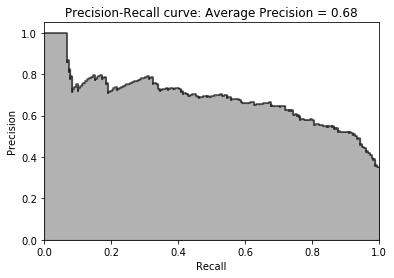

In [26]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


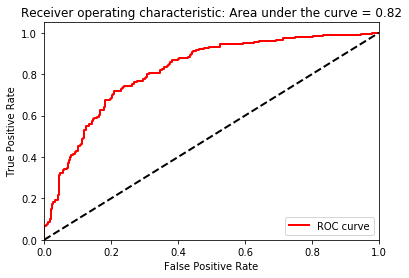

In [27]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [28]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=2019,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
cr=classification_report(y_test, model.predict(X_test))

print('\nAUC= '+str(roc))
print('\nclassification report:\n')
print(cr)


AUC= 0.8006809669731019

classification report:

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       165
           1       0.58      0.70      0.64        89

   micro avg       0.72      0.72      0.72       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.74      0.72      0.73       254



# [Hyperparameter optimization][1]

In ML, <u><b> hyperparameter optimization or tuning </b></u> is the problem of choosing a set of optimal hyperparameters for a learning algorithm. All combinations of hyperparameters  present a <b> search space </b> and there are many types of [approaches][2]:
1. [Grid Search][3]: It is an exhaustive searching that navigates all possible cobminations of hyperparameters in the search space and validates all selections to select the best one.
2. [Random Search][4]: It selects the hyperparameter values randomely and validate all selections to select the best one. 
3. [Others][1].




[1]:https://en.wikipedia.org/wiki/Hyperparameter_optimization.
[2]: https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/.
[3]:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
[4]:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [30]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# Create logistic regression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [31]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [32]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [33]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [34]:
roc=roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
cr=classification_report(y_test, best_model.predict(X_test))

print('\nAUC= '+str(roc))
print('\nclassification report:\n')
print(cr)


AUC= 0.8210418794688458

classification report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       165
           1       0.72      0.61      0.66        89

   micro avg       0.78      0.78      0.78       254
   macro avg       0.76      0.74      0.75       254
weighted avg       0.77      0.78      0.77       254



In [35]:
# Create randomized search using 5-fold cross validation
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf = RandomizedSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [36]:
# Fit search
best_model = clf.fit(X_train, y_train)

In [37]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


In [38]:
roc=roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
cr=classification_report(y_test, best_model.predict(X_test))

print('\nAUC= '+str(roc))
print('\nclassification report:\n')
print(cr)


AUC= 0.823765747361253

classification report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       165
           1       0.72      0.61      0.66        89

   micro avg       0.78      0.78      0.78       254
   macro avg       0.76      0.74      0.75       254
weighted avg       0.77      0.78      0.77       254



# [Error analysis in ML][1]




[1]:http://mlwiki.org/index.php/Error_Analysis.

In [39]:
# Confusion matrix analysis

y_pred=best_model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[144,  21],
       [ 35,  54]])

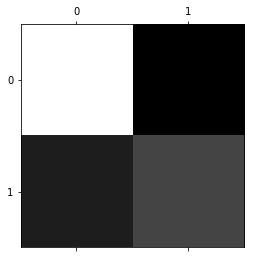

In [40]:
plt.matshow(conf_matrix,cmap=plt.cm.gray)
plt.show()

In [41]:
#Output the data points of error predictions

c1_a,c1_b=0,1
X_aa=X_test[(y_test==c1_a) & (y_pred==c1_a)]
X_ab=X_test[(y_test==c1_a) & (y_pred==c1_b)]
X_ba=X_test[(y_test==c1_b) & (y_pred==c1_a)]
X_bb=X_test[(y_test==c1_b) & (y_pred==c1_b)]

In [42]:
(X_ba[:]['age']).sort_values()

580    21
397    22
709    23
197    23
109    24
308    25
6      26
659    27
419    28
366    29
476    29
16     31
218    32
539    32
164    32
646    33
187    33
730    34
322    36
116    38
66     38
128    40
440    41
722    42
64     42
592    44
387    45
510    46
766    47
618    50
584    52
9      54
560    54
388    58
666    70
Name: age, dtype: int64

In [43]:
X_b=X_test[(y_test==c1_b)]

In [44]:
# Analyze each feature values and draw the conclusion
(X_b[:]['age']).sort_values()

580    21
397    22
606    22
661    22
237    23
197    23
709    23
293    24
109    24
399    25
308    25
120    25
235    26
6      26
753    26
659    27
391    27
303    28
515    28
31     28
419    28
366    29
476    29
317    29
359    29
360    29
132    30
394    31
675    31
16     31
       ..
22     41
64     42
722    42
152    42
26     43
693    43
323    43
154    43
592    44
387    45
510    46
231    46
766    47
283    47
159    47
614    50
749    50
0      50
618    50
24     51
584    52
702    52
546    53
9      54
560    54
498    55
39     56
388    58
759    66
666    70
Name: age, Length: 89, dtype: int64

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
print(fpr)
print(tpr)
print(thresholds)

[0.    0.127 1.   ]
[0.    0.607 1.   ]
[2 1 0]


# Multi-class example

Please read the [link][1] and run the following cells.


[1]:http://rushdishams.blogspot.com/2011/08/micro-and-macro-average-of-precision.html


In [46]:
#All-in-one:
iris = pd.read_csv("~/DATA/Iris.csv")  # Load the data
iris.head()  # Peek at the data
X = iris[iris.columns[1:5]]
y = iris[iris.columns[5]]
X=np.array(X)
y=np.array(y)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y=encoder.fit_transform(y.reshape(-1,1))


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Load the standard scaler
sc.fit(X)  # Compute the mean and standard deviation of the feature data
X_scaled = sc.transform(X)  # Scale the feature data to be of mean 0 and variance 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=1)  # Split the dataset into 30% testing, and 70% training 


In [47]:
X_train

array([[ 2.250e+00, -1.051e+00,  1.786e+00,  1.448e+00],
       [-1.737e-01,  1.726e+00, -1.171e+00, -1.182e+00],
       [-1.022e+00,  1.263e+00, -1.341e+00, -1.313e+00],
       [-1.264e+00, -1.250e-01, -1.341e+00, -1.182e+00],
       [-7.795e-01, -8.192e-01,  8.037e-02,  2.647e-01],
       [-9.007e-01,  8.007e-01, -1.284e+00, -1.313e+00],
       [-4.160e-01,  1.032e+00, -1.398e+00, -1.313e+00],
       [ 2.250e+00,  1.726e+00,  1.673e+00,  1.316e+00],
       [ 1.280e+00,  1.064e-01,  9.334e-01,  1.185e+00],
       [ 1.765e+00, -3.564e-01,  1.445e+00,  7.906e-01],
       [ 6.745e-01, -5.878e-01,  1.047e+00,  1.316e+00],
       [ 4.322e-01, -5.878e-01,  5.922e-01,  7.906e-01],
       [ 1.898e-01,  8.007e-01,  4.216e-01,  5.276e-01],
       [ 2.250e+00, -5.878e-01,  1.673e+00,  1.054e+00],
       [-1.737e-01, -1.250e-01,  2.510e-01,  1.753e-03],
       [-1.264e+00,  8.007e-01, -1.228e+00, -1.313e+00],
       [-1.737e-01, -1.282e+00,  7.059e-01,  1.054e+00],
       [ 5.533e-01, -8.192e-01,

In [48]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=3)  # Load our classifier
model.fit(X_train, y_train)  # Fit our model on the training data
prediction = model.predict(X_test)  # Make predictions with our trained model on the test data 
accuracy = accuracy_score(y_test, prediction) * 100  # Compare accuracy of predicted classes with test data
print('k-Nearest Neighbours accuracy | ' + str(round(accuracy, 2)) + ' %.') 

k-Nearest Neighbours accuracy | 97.78 %.


In [50]:

"""
If you want to display the multi-classconfusion:

from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, prediction)

"""


from sklearn.metrics import f1_score
f1_score(y_test, prediction, average="macro")  #you need wights in your calculation (macro(sum per each label) or micro(global calculation))

0.9776576576576578

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes=y_test.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        prediction[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], prediction[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["macro"], recall["macro"], _ = precision_recall_curve(y_test.ravel(),
    prediction.ravel())
average_precision["macro"] = average_precision_score(y_test, prediction,
                                                     average="macro")
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(average_precision["macro"]))

Average precision score, macro-averaged over all classes: 0.96


Text(0.5, 1.0, 'Average precision score, macro-averaged over all classes: AP=0.96')

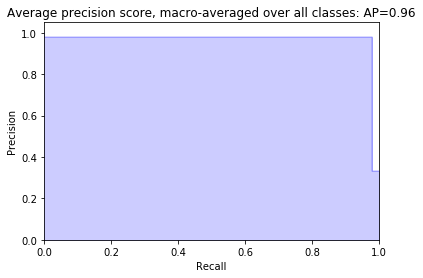

In [52]:
from inspect import signature
import matplotlib.pyplot as plt


# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure()
plt.step(recall['macro'], precision['macro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["macro"], precision["macro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, macro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["macro"]))

In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from scipy import interp



# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), prediction.ravel(),pos_label=2)
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

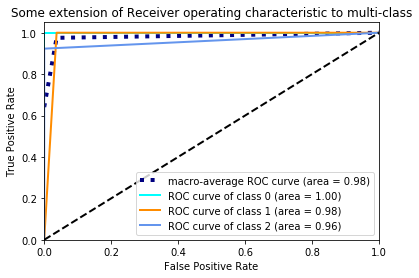

In [54]:
from itertools import cycle
lw =2 

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()